# Bắt đầu 

## Bài toán: Dự đoán Sống sót trên tàu Titanic (Titanic Disaster Survival)


1. Định nghĩa vấn đề (Define Problem)
Xây dựng một mô hình dự đoán khả năng sống sót của hành khách trên con tàu Titanic. Dựa vào các thông tin cho trước của hành khách (như tuổi, giới tính, hạng vé,...), mô hình sẽ phân loại hành khách vào hai nhóm: Sống sót (Survived) hoặc Không sống sót (Not Survived).

Đây là một bài toán phân loại nhị phân (binary classification), vì mục tiêu là dự đoán một trong hai kết quả có thể xảy ra.

2. Mô tả (Description)
Bộ dữ liệu "Titanic: Machine Learning from Disaster" là một trong những bộ dữ liệu kinh điển nhất, thường được sử dụng cho người mới bắt đầu trong lĩnh vực học máy. Dữ liệu chứa thông tin nhân khẩu học và thông tin chuyến đi của một phần hành khách trên chuyến tàu RMS Titanic định mệnh vào năm 1912. Vụ chìm tàu Titanic là một trong những thảm họa hàng hải nghiêm trọng nhất trong lịch sử, và bộ dữ liệu này được tạo ra để khám phá xem những yếu tố nào đã ảnh hưởng đến cơ hội sống sót của một người.

3. Dữ liệu vào (Features)
Các đặc điểm (thuộc tính) của mỗi hành khách được sử dụng để dự đoán:

Pclass: Hạng vé (1 = Hạng 1, 2 = Hạng 2, 3 = Hạng 3).

Sex: Giới tính (male, female).

Age: Tuổi của hành khách (tính bằng năm).

SibSp: Số lượng anh chị em / vợ chồng đi cùng trên tàu.

Parch: Số lượng cha mẹ / con cái đi cùng trên tàu.

Fare: Giá vé mà hành khách đã trả.

Cabin: Số cabin của hành khách.

Embarked: Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton).

4. Kết quả (Target)
Đầu ra cần dự đoán là cột Survived:

Survived: Cột này cho biết hành khách có sống sót hay không.

0 = Không sống sót (No)

1 = Sống sót (Yes)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [5]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [6]:
data_path = "train.csv"
df = pd.read_csv(data_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [7]:
import pandas as pd
from IPython import display



# --- Kiểm tra toàn vẹn dữ liệu ---
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()

print("TÍNH TOÀN VẸN DỮ LIỆU:")
print(f"+ Có giá trị Null: {has_null}")
if has_null:
    print("→ Các dòng có giá trị Null:")
    display.display(df[df.isnull().any(axis=1)])

print(f"+ Có giá trị NaN: {has_nan}")
if has_nan:
    print("→ Các dòng có giá trị NaN:")
    display.display(df[df.isna().any(axis=1)])

print(f"+ Số dòng trùng lặp: {n_duplicated}")
if n_duplicated > 0:
    print("→ Các dòng trùng lặp:")
    display.display(df[df.duplicated()])

    # Ví dụ nếu muốn hiển thị cụ thể vài dòng nghi ngờ trùng (thay query cho phù hợp)
    # s_query1 = "`Name` == 'Allen, Mr. William Henry' and `Age` == 35 and `Sex` == 'male'"
    # display.display(df_dataset.query(s_query1))


TÍNH TOÀN VẸN DỮ LIỆU:
+ Có giá trị Null: True
→ Các dòng có giá trị Null:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


+ Có giá trị NaN: True
→ Các dòng có giá trị NaN:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


+ Số dòng trùng lặp: 0


Nhận xét:

Dữ liệu có gì trị null, giá trị nan và không có dòng trùng lặp

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [8]:
description = df.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Nhận xét:

Survived mean= 0.384 cho thấy tập dữ liệu thiên về tỉ lệ tử vong nhiều hơn. Có thể thấy tầng lớp thấp (Pclass=3) chiếm tỷ lệ cao, có thể ảnh hưởng mạnh đến khả năng sống sót. Trung vị median, Điều này có nghĩa là ít nhất 50% số hành khách đi vé hạng 3. Giá trị trung bình (mean ≈ 2.3) cũng cho thấy số lượng hành khách ở các hạng vé thấp (2 và 3) chiếm đa số. Đa số hành khách là thanh niên và người trưởng thành trẻ tuổi. Độ lệch chuẩn (std) khá lớn (14.5), cho thấy độ tuổi rất đa dạng. SibSp (anh chị em/vợ chồng): 75% số hành khách đi cùng tối đa 1 người. Trung vị (50%) là 0. Phần lớn hành khách đi một mình hoặc theo nhóm nhỏ (2 người). Rất ít hành khách đi theo các gia đình lớn (giá trị max là 8 và 6 cho thấy có những trường hợp ngoại lệ). Fare mean=32, 50%= 14,45, Đây là dấu hiệu của một phân phối lệch phải (right-skewed). Có một số lượng nhỏ vé với giá cực kỳ cao (có thể là vé hạng nhất hoặc cabin đặc biệt, max = 512) đã kéo giá trị trung bình lên cao, trong khi phần lớn hành khách (hơn 75%) trả giá vé dưới 31.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [9]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [10]:
from IPython import display


# Tính toán ma trận tương quan Pearson chỉ trên các cột số
numeric_columns = df.select_dtypes(include=[np.number])
correlations_titanic = numeric_columns.corr(method='pearson')

# Hiển thị ma trận
print("Ma trận tương quan (Pearson) cho dữ liệu Titanic:")
display.display(correlations_titanic)

Ma trận tương quan (Pearson) cho dữ liệu Titanic:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Nhận xét

Pclass -0.338 tương quan nghịch với Survived giảm, Khi số Pclass tăng (tức là hạng vé thấp hơn, từ 1 -> 3), khả năng Survived giảm. Điều này khẳng định rằng hành khách ở hạng 1 có cơ hội sống sót cao hơn nhiều so với hành khách ở hạng 3. Đây là một yếu tố dự đoán rất quan trọng. Fare mối tương quan thuận, khi Fare (giá vé) tăng, khả năng Survived cũng tăng. Điều này hoàn toàn phù hợp với mối tương quan của Pclass, vì giá vé cao hơn tương ứng với hạng vé tốt hơn. Parch 0.082 tương quan thuận nhưng yếu đuối, Có một xu hướng không đáng kể cho thấy tuổi càng cao thì khả năng sống sót càng thấp. Mối quan hệ này có thể phức tạp hơn là tuyến tính (ví dụ: trẻ em được ưu tiên).  

Với tương quan các đặc điểm:

Fare và Pclass (-0.550): Đây là mối tương quan nghịch mạnh nhất trong toàn bộ ma trận.
Điều này là hiển nhiên: hạng vé càng cao (Pclass càng thấp, ví dụ = 1) thì giá vé (Fare) càng đắt. Mối quan hệ này củng cố tính logic của dữ liệu. SibSp và Parch (0.415): Mối tương quan thuận vừa phải. Ý nghĩa: Những hành khách đi cùng anh chị em/vợ chồng cũng có xu hướng đi cùng cha mẹ/con cái. Điều này hợp lý vì cả hai biến này đều liên quan đến quy mô gia đình. Age và Pclass (-0.369): Mối tương quan nghịch vừa phải.Hành khách ở các hạng vé cao hơn (Pclass thấp hơn) có xu hướng lớn tuổi hơn. Ngược lại, hành khách ở hạng 3 thường trẻ tuổi hơn.


### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

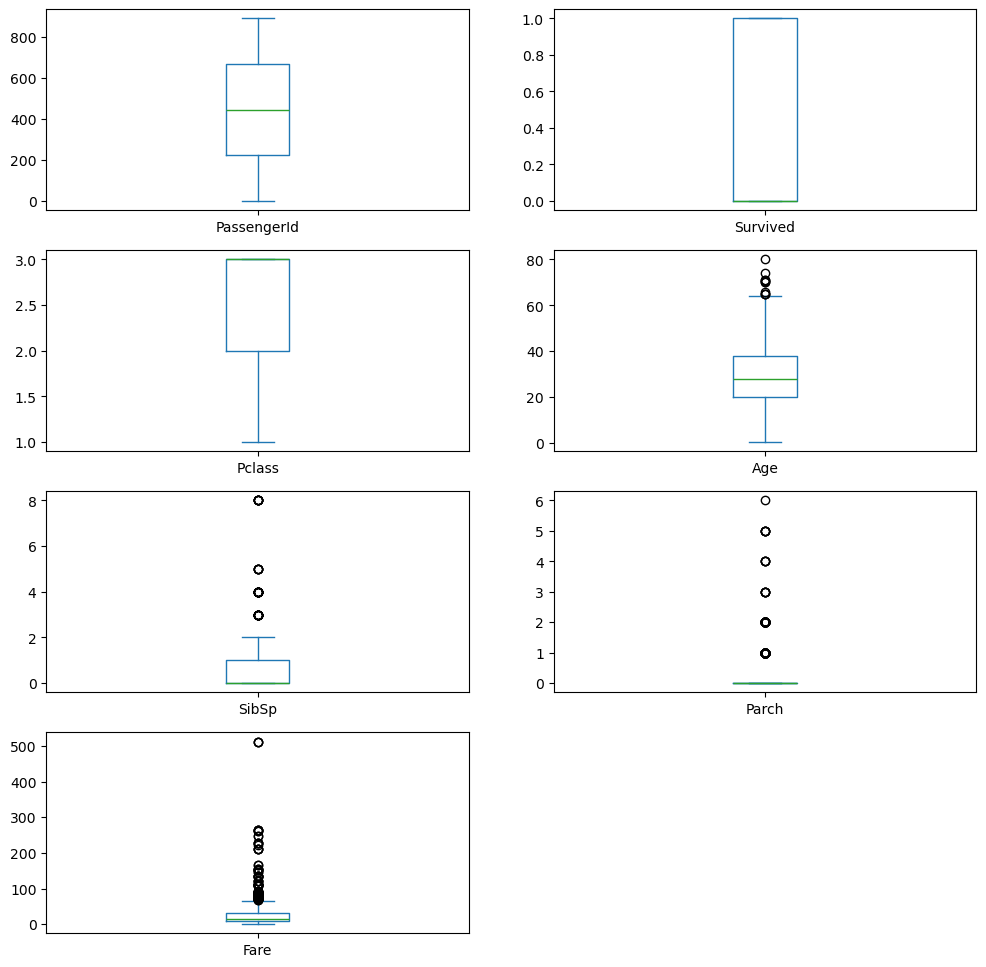

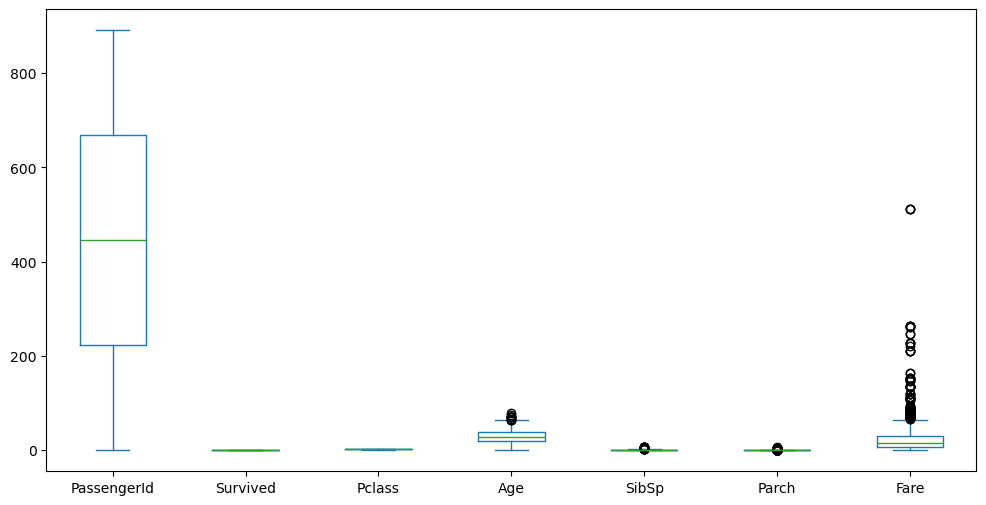

In [11]:
df.plot(kind="box", subplots=True, layout=(4, 2), sharex=False, sharey=False, figsize=(12, 12));
df.plot(kind="box", figsize=(12, 6));
plt = plt.show()

Nhận xét:

Các biểu đồ cho Age, SibSp, Parch, và đặc biệt là Fare có các giá trị ngoại lai (outliers), tức là những giá trị nằm rất xa so với phần lớn dữ liệu.SibSp và Parch: Các giá trị ngoại lai ở đây đại diện cho những gia đình rất đông người, đây là trường hợp hiếm so với phần lớn hành khách. Pclass (Hạng vé): Hộp (IQR - interquartile range) nằm giữa 2 và 3, và đường trung vị (median) nằm ngay ở mức 3. Điều này cho thấy hơn 50% số hành khách đi vé hạng 3. SibSp (Anh chị em/Vợ chồng) và Parch (Cha mẹ/Con cái): Cả hai biểu đồ này đều có hộp bị nén chặt ở phía dưới, với đường trung vị nằm ở mức 0. Điều này chứng tỏ phần lớn hành khách (hơn 75%) đi một mình, không đi cùng người thân. Survived (Sống sót): Vì đây là biến nhị phân (0 hoặc 1), biểu đồ boxplot cho thấy đường trung vị ở mức 0. Điều này một lần nữa khẳng định rằng hơn một nửa số hành khách trong tập dữ liệu đã không qua khỏi.

**Biểu đồ Histogram**

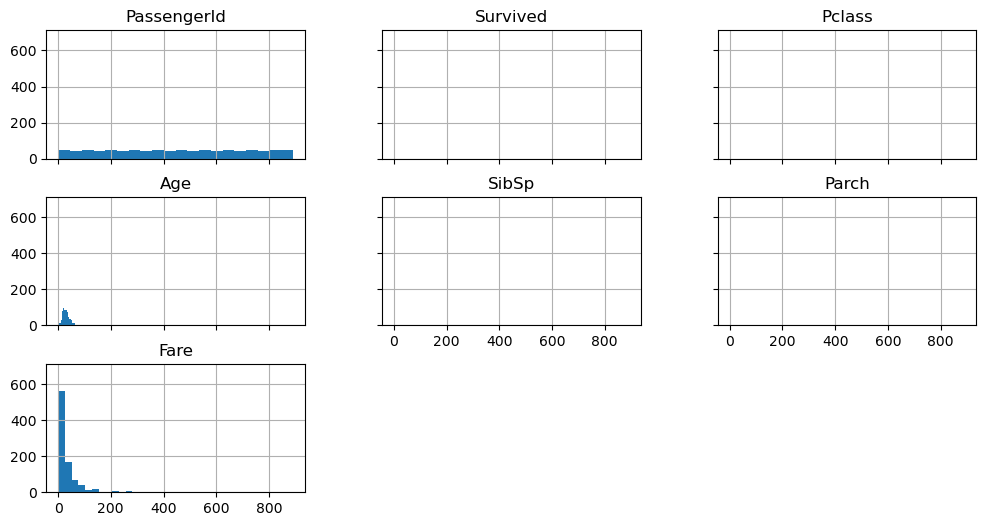

In [12]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 6), bins=20, sharex=True, sharey=True)
plt.show()

Lý do là vì histogram không phải là công cụ phù hợp để trực quan hóa các biến này.

Histogram dùng để hiển thị tần suất của dữ liệu liên tục được chia thành các khoảng (bins), ví dụ như Age (tuổi) và Fare (giá vé).

Các biến còn lại là dữ liệu rời rạc (chỉ có một vài giá trị cụ thể, ví dụ Survived chỉ là 0 hoặc 1; Pclass là 1, 2, 3). Khi vẽ histogram cho chúng, các giá trị này bị dồn vào những khoảng rất hẹp và có thể không hiển thị rõ ràng.



## Bar chart ##

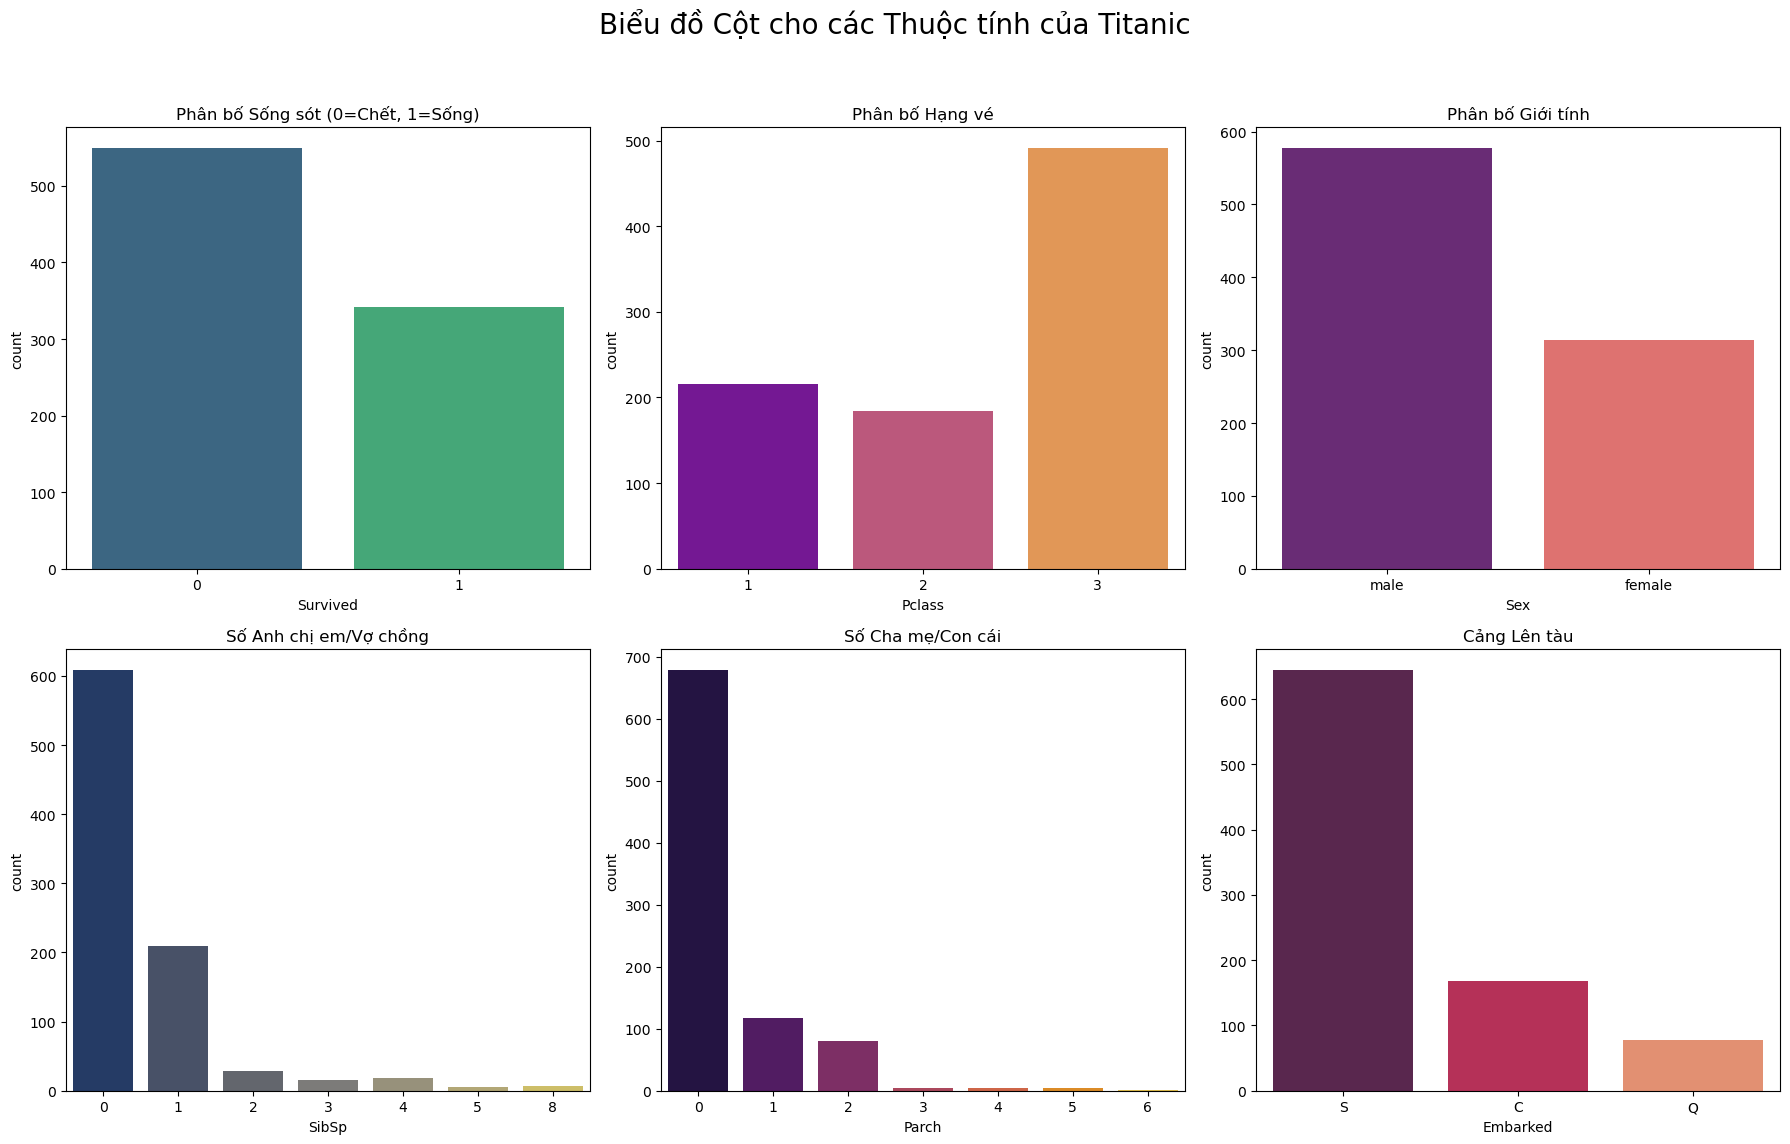

In [13]:
# Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    df = pd.read_csv("train.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'train.csv'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# --- 2. Chuẩn bị cho việc vẽ biểu đồ ---
# Chọn các cột có tính chất phân loại hoặc rời rạc phù hợp cho biểu đồ cột
categorical_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Tạo một figure chứa các biểu đồ con (subplots)
# Lưới 2x3 phù hợp để hiển thị 6 biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Biểu đồ Cột cho các Thuộc tính của Titanic', fontsize=20)

# --- 3. Vẽ từng biểu đồ ---
# Sử dụng seaborn.countplot để tự động đếm và vẽ số lượng cho mỗi giá trị
sns.countplot(ax=axes[0, 0], x='Survived', data=df, palette='viridis')
axes[0, 0].set_title('Phân bố Sống sót (0=Chết, 1=Sống)')

sns.countplot(ax=axes[0, 1], x='Pclass', data=df, palette='plasma')
axes[0, 1].set_title('Phân bố Hạng vé')

sns.countplot(ax=axes[0, 2], x='Sex', data=df, palette='magma')
axes[0, 2].set_title('Phân bố Giới tính')

sns.countplot(ax=axes[1, 0], x='SibSp', data=df, palette='cividis')
axes[1, 0].set_title('Số Anh chị em/Vợ chồng')

sns.countplot(ax=axes[1, 1], x='Parch', data=df, palette='inferno')
axes[1, 1].set_title('Số Cha mẹ/Con cái')

sns.countplot(ax=axes[1, 2], x='Embarked', data=df, palette='rocket')
axes[1, 2].set_title('Cảng Lên tàu')

# --- 4. Hiển thị biểu đồ ---
# Tự động điều chỉnh khoảng cách giữa các biểu đồ con
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Nhận xét:

Các biểu đồ cho thấy rõ ràng phần lớn hành khách trên tàu Titanic là nam giới, đi vé hạng 3, và lên tàu tại cảng Southampton (S). Đa số họ đi một mình, thể hiện qua số lượng áp đảo người không có anh chị em/vợ chồng (SibSp=0) hoặc cha mẹ/con cái (Parch=0) đi cùng. Về kết quả, biểu đồ sống sót cho thấy một thực tế nghiệt ngã: số người không qua khỏi (cột 0) cao hơn đáng kể so với số người sống sót (cột 1).

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [14]:
df_clean = df.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [15]:
display.display(df_clean[df_clean.duplicated()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [16]:
# Đếm số lượng giá trị null trong mỗi cột
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import pandas as pd
import numpy as np


print("Số lượng giá trị null TRƯỚC khi xử lý:")
print(df_clean.isnull().sum())
print("-" * 30)

# --- 1. Xử lý cột 'Age' ---
# Điền các giá trị null bằng giá trị TRUNG BÌNH (mean) của cột 'Age'
mean_age = df_clean['Age'].mean()
df_clean['Age'].fillna(mean_age, inplace=True)
print(f"Đã điền {df['Age'].isnull().sum()} giá trị null trong cột 'Age' bằng giá trị trung bình: {mean_age:.2f}")


# --- 2. Xử lý cột 'Cabin' ---
# Cột 'Cabin' có quá nhiều giá trị null (687/891), không thể điền trung bình.
# Cách xử lý tốt nhất là xóa cột này.
df_clean.drop('Cabin', axis=1, inplace=True)
print("Đã xóa cột 'Cabin' vì có quá nhiều giá trị null.")


# --- 3. Xử lý cột 'Embarked' ---
# Cột 'Embarked' là dữ liệu phân loại, không thể điền trung bình.
# Ta sẽ điền bằng giá trị xuất hiện nhiều nhất (mode).
mode_embarked = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Đã điền {df['Embarked'].isnull().sum()} giá trị null trong cột 'Embarked' bằng giá trị phổ biến nhất: '{mode_embarked}'")
print("-" * 30)


# --- Kiểm tra kết quả ---
print("\nSố lượng giá trị null SAU khi xử lý:")
print(df_clean.isnull().sum())

Số lượng giá trị null TRƯỚC khi xử lý:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Đã điền 177 giá trị null trong cột 'Age' bằng giá trị trung bình: 29.70
Đã xóa cột 'Cabin' vì có quá nhiều giá trị null.
Đã điền 2 giá trị null trong cột 'Embarked' bằng giá trị phổ biến nhất: 'S'
------------------------------

Số lượng giá trị null SAU khi xử lý:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

Sex: kh cần vì 0 1 là đủ


Embarked: Đây là ví dụ hoàn hảo. Các giá trị 'S', 'C', 'Q' đại diện cho các cảng khác nhau và không có cảng nào "lớn hơn" hay "tốt hơn" cảng nào.

In [20]:
import pandas as pd
from IPython.display import display
# Giả sử df_clean là DataFrame đã xử lý null của bạn
print("Dữ liệu gốc:")
display(df_clean[['Embarked']].head())

# Áp dụng One-Hot Encoding cho cột 'Embarked'
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], prefix='Embarked')

print("\nDữ liệu sau khi One-Hot Encoding:")
display(df_clean.head())

Dữ liệu gốc:


,Embarked
0,S
1,C
2,S
3,S
4,S



Dữ liệu sau khi One-Hot Encoding:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,False,False,True


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

Việc chuẩn hóa giúp đưa các thuộc tính có thang đo khác nhau (ví dụ: Age từ 0-80, trong khi Fare từ 0-512) về cùng một thang đo chung. Điều này đảm bảo rằng các thuật toán máy học sẽ không bị "thiên vị" và đánh giá quá cao các thuộc tính có giá trị lớn hơn.

Giống như việc so sánh một khoảng cách đo bằng mét và một khoảng cách đo bằng kilomet, bạn cần đưa chúng về cùng một đơn vị để có sự so sánh công bằng.

In [21]:
from sklearn.preprocessing import StandardScaler
# cột chuần hóa
cols_to_scale = ['Age', 'Fare']

# Khởi tạo scaler
scaler = StandardScaler()

# Fit và transform dữ liệu
# scaler.fit_transform sẽ trả về một mảng numpy,
# nên chúng ta cần gán lại vào các cột trong DataFrame
df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

print("Dữ liệu sau khi chuẩn hóa:")
display(df_clean[['Age', 'Fare']].head())

Dữ liệu sau khi chuẩn hóa:


,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337


    Đây đều là dữ liệu thực nên sẽ không xử lí các outlier  

## 1. Phân chia dữ liệu (Train-Test Split)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Import các mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

if 'Name' in df_clean.columns:
    # drop cột không ảnh hưởng
    df_clean.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# (Các bước mã hóa 'Sex', 'Embarked' và chuẩn hóa 'Age', 'Fare' của bạn ở đây)

if 'Sex' in df_clean.columns and df_clean['Sex'].dtype == 'object':
    df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})


# 1. Tách biến mục tiêu (y) và các biến đặc trưng (X)
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

# 2. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Khởi tạo danh sách các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# 4. Huấn luyện và đánh giá từng mô hình (sẽ không còn lỗi)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 5. In ra bảng so sánh kết quả
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n--- Bảng xếp hạng độ chính xác ---")
print(results_df)


--- Bảng xếp hạng độ chính xác ---
                    Model  Accuracy
1     K-Nearest Neighbors  0.821229
3           Random Forest  0.815642
4  Support Vector Machine  0.815642
0     Logistic Regression  0.810056
2           Decision Tree  0.793296
5             Naive Bayes  0.776536


## Trực quan hóa để chọn ra các thuộc tính quan trọng

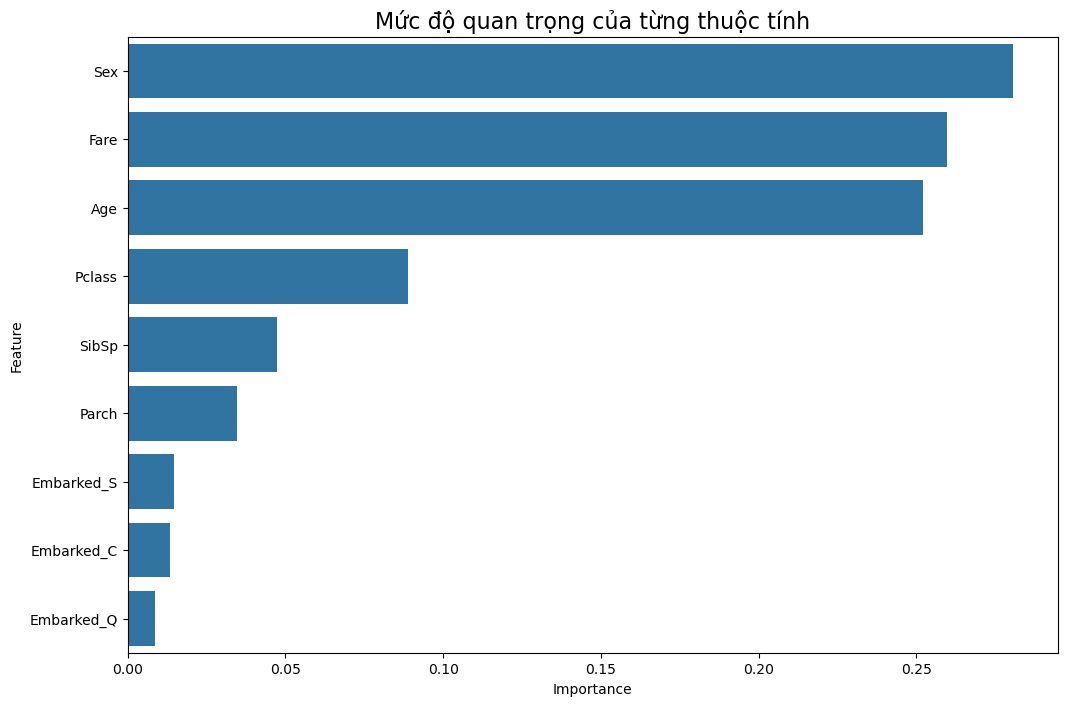

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Lấy ra danh sách các thuộc tính và độ quan trọng của chúng
importances = model.feature_importances_
feature_names = X_train.columns

# Tạo DataFrame để dễ dàng trực quan hóa
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sắp xếp các thuộc tính theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Mức độ quan trọng của từng thuộc tính', fontsize=16)
plt.show()

## Sau khi có được biểu đồ này, chọn thử 4 thuộc tính quan trộng nhất

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 1. Chọn ra các thuộc tính quan trọng nhất
important_features = ['Sex', 'Fare', 'Age', 'Pclass']

# Tạo một DataFrame mới chỉ chứa các thuộc tính này
X_selected = X[important_features]

print("Các thuộc tính được chọn để huấn luyện lại mô hình:")
print(X_selected.head())

# 2. Chia lại dữ liệu với các thuộc tính đã chọn
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# 3. Khởi tạo và huấn luyện mô hình RandomForest
model_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected_features.fit(X_train_selected, y_train)

# 4. Đánh giá mô hình mới
y_pred_selected = model_selected_features.predict(X_test_selected)
accuracy_new = accuracy_score(y_test, y_pred_selected)

print("\n--------------------------------------------------")
# print(f"Độ chính xác của mô hình cũ (với tất cả features): {accuracy_old:.4f}")
print(f"Độ chính xác của mô hình MỚI (chỉ với 4 features): {accuracy_new:.4f}")
print("--------------------------------------------------")

Các thuộc tính được chọn để huấn luyện lại mô hình:
   Sex      Fare       Age  Pclass
0    0 -0.502445 -0.592481       3
1    1  0.786845  0.638789       1
2    1 -0.488854 -0.284663       3
3    1  0.420730  0.407926       1
4    0 -0.486337  0.407926       3

--------------------------------------------------
Độ chính xác của mô hình MỚI (chỉ với 4 features): 0.7933
--------------------------------------------------


Sau khi điều chỉnh số lượng thuộc tính quan trọng dộ chính xác đều giảm so với ban đầu

## Thử với K neighbors 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Chọn ra các thuộc tính quan trọng nhất
important_features = ['Sex', 'Fare', 'Age', 'Pclass']

# Tạo một DataFrame mới chỉ chứa các thuộc tính này
X_selected = X[important_features]

print("Các thuộc tính được chọn để huấn luyện lại mô hình:")
print(X_selected.head())

# 2. Chia lại dữ liệu với các thuộc tính đã chọn
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# 3. Khởi tạo và huấn luyện mô hình K-Nearest Neighbors
model_selected_features = KNeighborsClassifier(n_neighbors=5)  # có thể thử đổi số láng giềng khác
model_selected_features.fit(X_train_selected, y_train)

# 4. Đánh giá mô hình mới
y_pred_selected = model_selected_features.predict(X_test_selected)
accuracy_new = accuracy_score(y_test, y_pred_selected)

print("\n--------------------------------------------------")
print(f"Độ chính xác của mô hình MỚI (KNN, chỉ với 4 features): {accuracy_new:.4f}")
print("--------------------------------------------------")


Các thuộc tính được chọn để huấn luyện lại mô hình:
   Sex      Fare       Age  Pclass
0    0 -0.502445 -0.592481       3
1    1  0.786845  0.638789       1
2    1 -0.488854 -0.284663       3
3    1  0.420730  0.407926       1
4    0 -0.486337  0.407926       3

--------------------------------------------------
Độ chính xác của mô hình MỚI (KNN, chỉ với 4 features): 0.8156
--------------------------------------------------


Sau khi điều chỉnh số lượng thuộc tính quan trọng dộ chính xác đều giảm so với ban đầu

Chọn mô hình KNN, các thông tin: 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

feature = ['Sex', 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_selected = X[feature]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['Không sống sót (0)', 'Sống sót (1)']))



                    precision    recall  f1-score   support

Không sống sót (0)       0.83      0.87      0.85       105
      Sống sót (1)       0.80      0.76      0.78        74

          accuracy                           0.82       179
         macro avg       0.82      0.81      0.81       179
      weighted avg       0.82      0.82      0.82       179



## Kaggle yêu cầu dự đoán trên tập test.csv 

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# --- 1. Tải dữ liệu ---
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_passenger_ids = test_df['PassengerId']

# --- 2. Kỹ thuật Đặc trưng (Áp dụng cho cả train và test) ---
# Kết hợp cả hai để xử lý đồng nhất
full_df = pd.concat([train_df, test_df], sort=False, ignore_index=True)

# Tạo đặc trưng FamilySize và IsAlone từ SibSp và Parch
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1
full_df['IsAlone'] = (full_df['FamilySize'] == 1).astype(int)

# Trích xuất Title từ Name và nhóm các title hiếm
full_df['Title'] = full_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
full_df['Title'] = full_df['Title'].replace(rare_titles, 'Rare')
full_df['Title'] = full_df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

# --- 3. Xử lý dữ liệu bị thiếu (Cách làm đúng, không rò rỉ) ---
# Tách lại để tính toán chỉ trên tập train
train_temp = full_df.iloc[:len(train_df)]
test_temp = full_df.iloc[len(train_df):]

# Điền Age bị thiếu bằng trung vị của các nhóm (Pclass, Sex) tính từ tập train
age_medians_train = train_temp.groupby(['Sex', 'Pclass'])['Age'].median()
full_df['Age'] = full_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Điền Fare bị thiếu trong tập test bằng trung vị của tập train
fare_median_train = train_temp['Fare'].median()
full_df['Fare'].fillna(fare_median_train, inplace=True)

# --- 4. Mã hóa các thuộc tính phân loại ---
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
full_df['Title'] = full_df['Title'].map(title_mapping).fillna(0)
full_df['Sex'] = full_df['Sex'].map({'male': 0, 'female': 1})
full_df = pd.get_dummies(full_df, columns=['Embarked'], prefix='Embarked')

# --- 5. Loại bỏ các cột không cần thiết ---
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
full_df = full_df.drop(drop_elements, axis=1)

# --- 6. Tách lại thành tập train và test cuối cùng ---
train_final = full_df.iloc[:len(train_df)]
test_final = full_df.iloc[len(train_df):].drop('Survived', axis=1)

X_train = train_final.drop('Survived', axis=1)
y_train = train_final['Survived']
X_test = test_final

# --- 7. Chuẩn hóa dữ liệu ---
scaler = StandardScaler()
cols_to_scale = ['Age', 'Fare', 'FamilySize']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# --- 8. Tinh chỉnh siêu tham số với GridSearchCV ---
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Tham số tốt nhất tìm được: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# --- 9. Dự đoán và Tạo file submission ---
test_predictions = best_model.predict(X_test)
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions.astype(int)
})
submission_df.to_csv('submission_rf_tuned.csv', index=False)

print("\nĐã tạo file 'submission_rf_tuned.csv' thành công!")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tham số tốt nhất tìm được: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}

Đã tạo file 'submission_rf_tuned.csv' thành công!
